# Linear Regression

Suppose we have $n$ data points, $(\mathbf{x},y)_{\{1,...,n\}}$ where $\mathbf{x}_i \in \mathbb{R}^d$ and $y_i \in \mathcal{R}$. We think (or conveniently suppose) that the independent variables $\mathbf{x}=\big[x_1,x_2,...,x_d \big]$ are determining $y$ by a linear combination. In other words we suppose the data points are lying on a hyperplane. We can mathematically model $y=\mathbf{a}\cdot\mathbf{x}+b$ where $\mathbf{a}$ and $b$ are the parameters of our mathematical model. After determining the model, we can fit this model to our data at hand using different estimators.

## Least Squares Regression

As the name suggests, least squares regression finds the optimal model parameters by minimizing the average of the squared error made by our model. Mathematically, $\underset{\mathbf{a},b}{\mathrm{argmin}} \; \mathbb{E} \big[ (y_i-\hat{y_i})^2 \big]=\underset{\mathbf{a},b}{\mathrm{argmin}} \; \mathbb{E} \Big[ (y_i-(\mathbf{a}\cdot\mathbf{x}_i+b))^2 \Big]$. Let's do a programming example using this knowledge and using scikit-learn library.

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(123)
# read the comma separated values file
df = pd.read_csv("discussion2.csv", index_col=0)

N=len(df)

train_data=df[:int(N*0.8)]
test_data=df[int(N*0.8):]

# create LinearRegression estimator instance
reg=LinearRegression()

# train the LinearRegression. This finds the coefficients slope and intersect
reg.fit(train_data[["activity_level","weight"]],train_data["daily food"])
print(reg.coef_)


[0.0975713 0.0052627]


Text(0.5, 0, 'daily food')

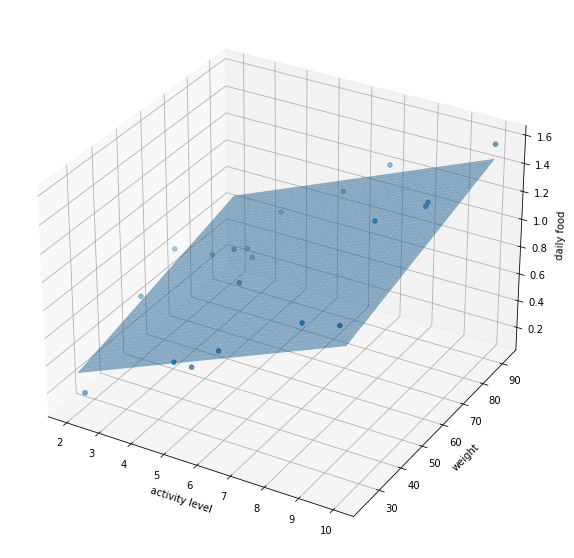

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# without projection=3d it only plots 2d
plt3d = plt.figure(figsize=(10,10)).gca(projection='3d')

plt3d.scatter(test_data["activity_level"].to_numpy(),test_data["weight"].to_numpy(),test_data["daily food"].to_numpy())

(x0_min,x0_max)=(test_data["activity_level"].min(),test_data["activity_level"].max())
(x1_min,x1_max)=(test_data["weight"].min(),test_data["weight"].max())

X = np.linspace(x0_min, x0_max, 100)
Y = np.linspace(x1_min, x1_max, 100)
X, Y = np.meshgrid(X, Y)

# what defines a plane? a*x0+b*x1=c !
Z = (reg.coef_[0]*X + reg.coef_[1]*Y)

plt3d.plot_surface(X, Y, Z, alpha=0.5)
plt3d.set_xlabel('activity level')
plt3d.set_ylabel('weight')
plt3d.set_zlabel('daily food')

# Grid Search and Cross Validation

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
import pandas as pd

df=pd.read_csv("../HW 1/wine.csv")
# with iloc you can select columns by their index
X=df.iloc[:,:-1].to_numpy()
y=df.iloc[:,-1].to_numpy()

# splits data into train and test
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1)

mlp = MLPClassifier()
# wraps around mlp and creates a new estimator that implements grid search and CV automatically!
clf=GridSearchCV(estimator=mlp, cv=10, param_grid={'hidden_layer_sizes': (5,10,100), 'activation': ('identity', 'logistic', 'tanh', 'relu')})

clf.fit(X_train, y_train)

# you can see all CV split accuracies for all combinations of hyperparameters 
print(clf.cv_results_)

{'mean_fit_time': array([0.02729926, 0.02046814, 0.20184653, 0.12476418, 0.16429605,
       0.34894519, 0.1519603 , 0.34753194, 0.37261693, 0.03110471,
       0.03276994, 0.21869588]), 'std_fit_time': array([0.02445965, 0.01196566, 0.27953197, 0.04892564, 0.08169727,
       0.12357489, 0.06586363, 0.20094756, 0.1763902 , 0.04031172,
       0.04470211, 0.23960679]), 'mean_score_time': array([0.00060532, 0.0010525 , 0.00092411, 0.00053108, 0.00051365,
       0.00061736, 0.00053158, 0.00076182, 0.00070283, 0.00065882,
       0.00061064, 0.00188546]), 'std_score_time': array([1.02248690e-04, 6.08411171e-04, 4.76325010e-04, 1.00130652e-04,
       4.28128608e-05, 1.16056336e-04, 5.44185067e-05, 4.35729546e-04,
       1.80188884e-04, 1.81578252e-04, 1.08076528e-04, 1.96549262e-03]), 'param_activation': masked_array(data=['identity', 'identity', 'identity', 'logistic',
                   'logistic', 'logistic', 'tanh', 'tanh', 'tanh', 'relu',
                   'relu', 'relu'],
             ma

In [43]:
max_index=clf.cv_results_["mean_test_score"].argmax()
print(f"best set of hyperparameters: ")
for (key,value) in clf.cv_results_["params"][max_index].items():
    print(f"{key}: {value}")
print("=================")

print("Mean validation accuracy: %.2f" % (100*clf.cv_results_["mean_test_score"][max_index]))
print("=================")

# get the best hyperparameters and train the whole train data 
mlp.set_params(**clf.cv_results_["params"][max_index])
mlp.fit(X_train, y_train)
y_predict=mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print("Test accuracy: %.2f" % (100*accuracy_score(y_test, y_predict)))
print("=================")

best set of hyperparameters: 
activation: logistic
hidden_layer_sizes: 100
Mean validation accuracy: 93.04
Test accuracy: 94.44


# Logistic Equation for Modeling Population Growth (Verhulst Modeling)

Suppose you started working as a data scientist for a biotech company. In a project assigned to you they want you to analyze the efficacy of an antibiotic on a strain of bacteria. Your biologist colleagues do the experiments in petri dishes of different sizes and give you the data that contains snapshots at a few time points.

![SegmentLocal](bacteria.gif "segment")

 You wrangle the data and extract the area occupied by the bacteria at each time point. Then you use the "logistic equation" to model the growth of the bacteria and estimate the growth rate of the bacteria.


## Understanding the ODE

$$
\frac{dP}{dt}=rP\Big(1-\frac{P}{K}\Big)
$$

where $r$ models the growth rate parameter and $K$ models the carrying capacity of the population. What does this look like for different values of $r$ and $K$?

The function $\texttt{scipy.integrate.solve_ivp(f, t, y0)}$ numerically integrates a system of ordinary differential equations given an initial value:

$$
\frac{dy}{dt} = f(t, y)\\
y(t_0) = y_0
$$

for the time values between the first and second values of $\texttt{t}$.

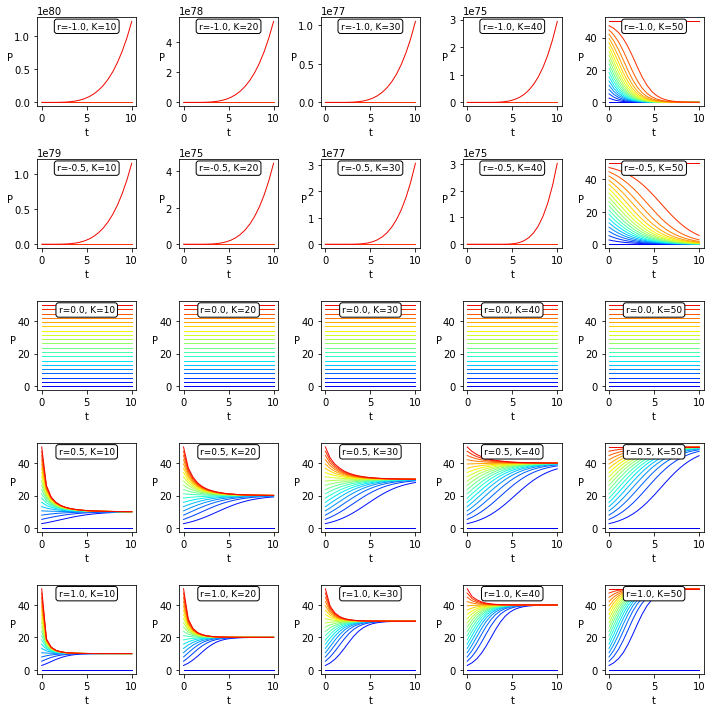

In [44]:
from scipy import integrate
from itertools import product
import matplotlib.pyplot as plt
import matplotlib as mpl

#### color settings
from cycler import cycler
color = plt.cm.jet(np.linspace(0.1,0.9,20))
mpl.rcParams['axes.prop_cycle'] = cycler('color', color)
#### color settings

plt.figure(figsize=(10,10))

# we will plot for all these different parameters 
# to see how they affect the behavior of the ODE
r_values=np.linspace(-1,1,5)
K_values=np.linspace(10,50,5)

t=np.linspace(0,10,20)
P0=np.linspace(0,50,20)
for combination_index, (r,K) in enumerate(product(r_values, K_values)):
    func=lambda t,P : r*P*(1-P/K) # defines the RHS of the ODE
    
    # solve the (I)nitial (V)alue (P)roblem
    # first arg: RHS of ODE
    # second arg: 2-tuple of first and last time points
    # third arg: initial values
    # dense_output enables us to evaluate later at any time step
    soln_obj=integrate.solve_ivp(func, (t[0],t[-1]), P0, dense_output=True)

    plt.subplot(len(r_values), len(K_values), combination_index+1)
    plt.plot(t, soln_obj.sol(t).T, linewidth=1)
    plt.annotate(f"r={r:.1f}, K={int(K):d}", xy=(0.5, 0.9), \
                xycoords='axes fraction', size=9, ha='center', \
                va='center', bbox=dict(boxstyle='round', fc='w'))
    plt.xlabel("t")
    plt.ylabel("P").set_rotation(0)
plt.tight_layout()
plt.show()

## Going backward: from observed data to model parameters

Suppose we were given some observed datapoints for the size of a population. We *assume* that the dynamics of this population obeys the dynamics described above. We then try to find the parameters $r$, $K$ and $P_0$ that explains data the best.

In [45]:
r_true=0.4
K_true=31
P0_true=3
t=np.linspace(0,10,100)
t_observed=t[::10] # assume we observe every 10th timestep!
func=lambda t,P : r_true*P*(1-P/K_true)
soln_obj=integrate.solve_ivp(func, (t[0],t[-1]), [P0_true], dense_output=True)
observed_data=soln_obj.sol(t_observed).squeeze()
# note that observed data need not be equally spaced
print(observed_data)

[ 3.          4.28705143  6.00639679  8.20628853 10.86501766 13.85962678
 16.98151334 19.97946029 22.65772809 24.88651839]


## Least Squares Estimate

True values are r=0.40, K=31.00, P0=3.00
MMSE estimate for r=0.40, K=31.00, P0=3.00


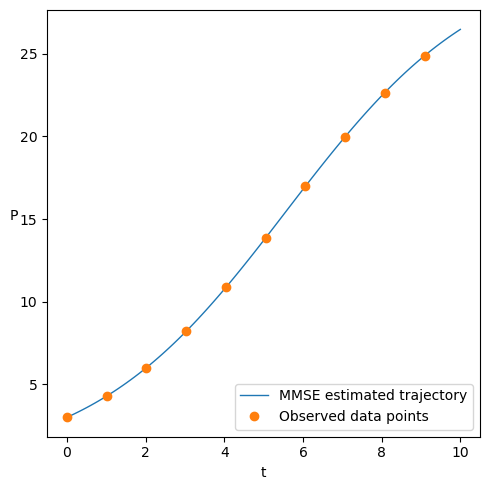

In [46]:
from sklearn.metrics import mean_squared_error

# this is the grid we will search
r_grid=np.linspace(0,1,21)
K_grid=np.linspace(10,49,40)
P0_grid=np.arange(1,10)

mmse=np.inf
r_mmse=np.nan
K_mmse=np.nan
P0_mmse=np.nan

# we don't need to include P0_grid in the for loop,
# solve_ivp can be run for different P0 values at once
for (r,K) in product(r_grid, K_grid):
    func=lambda t,P : r*P*(1-P/K)
    soln_obj=integrate.solve_ivp(func, (t[0],t[-1]), P0_grid, \
                                    method='RK45', dense_output=True)
    solutions = soln_obj.sol(t)
    local_mmse=np.inf
    for (solution_single_P0, P0) in zip(solutions, P0_grid):
        # indexing every 10'th data point to get data for observed time points
        mse = mean_squared_error(observed_data, solution_single_P0[::10]) 
        # local means minimum MSE among the initial conditions
        (local_mmse, local_P0_mmse) = (mse, P0) if (mse < local_mmse) else (local_mmse, local_P0_mmse)
    # this gets the minimum MSE over all grid points
    (mmse, r_mmse, K_mmse, P0_mmse) = (local_mmse, r, K, local_P0_mmse) if (local_mmse < mmse) else (mmse, r_mmse, K_mmse, P0_mmse)

print(f"True values are r={r_true:.2f}, K={K_true:.2f}, P0={P0_true:.2f}")
print(f"MMSE estimate for r={r_mmse:.2f}, K={K_mmse:.2f}, P0={P0_mmse:.2f}")
func = lambda t,P : r_mmse*P*(1-P/K_mmse)
# solve one last time with MMSE estimated parameters to plot
soln_obj = integrate.solve_ivp(func, [t[0],t[-1]], [P0_mmse], dense_output=True)

mpl.style.use('default')
plt.figure(figsize=(5,5))
plt.plot(t, soln_obj.sol(t).squeeze(), linewidth=1, label="MMSE estimated trajectory")
plt.plot(t[::10], observed_data, 'o', label="Observed data points")
plt.xlabel("t")
plt.ylabel("P").set_rotation(0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# System of ODEs – Lotka-Volterra equations

Now consider we that we observe the population sizes of foxes and rabbits (or any predator-prey). There is a system of ODEs that model such population dynamics called Lotka-Volterra equations:
$$
\frac{dx}{dt}=x(\alpha -\beta y)\\
\frac{dy}{dt}=y(\gamma-\delta x)
$$
where $x$ denotes population size of rabbits and $y$ the population size of foxes $\alpha$, $\beta$, $\gamma$ and $\delta$ are model parameters. What do trajectories look like for different parameter values?


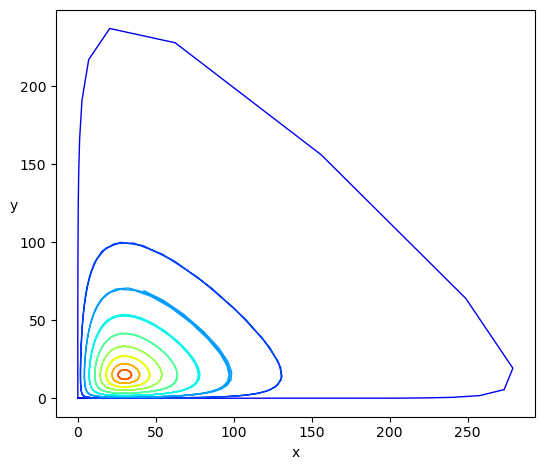

In [47]:
#### color settings
color = plt.cm.jet(np.linspace(0.1,0.9,10))
mpl.rcParams['axes.prop_cycle'] = cycler('color', color)
#### color settings

def lotka_volterra(t, Z, alpha, beta, gamma, delta):
    x, y = Z
    return [x * (alpha - beta*y), y * (delta*x - gamma)]

alpha=15
beta=1
gamma=30
delta=1

t=np.linspace(0,1,200)
(X0,Y0)=(np.linspace(0.15,gamma/delta*1.0,10), np.linspace(0.15,alpha/beta*1.0,10))
initial_conditions=np.stack((X0.reshape(-1),Y0.reshape(-1)),axis=1)
plot_handles=[]

fig=plt.figure()
for initial_condition in initial_conditions:
    # in addition to args before, the args in keyword "arg" are passed on to
    # the lotka_volterra function
    soln_obj=integrate.solve_ivp(lotka_volterra, (t[0],t[-1]), initial_condition, \
                            args=(alpha, beta, gamma, delta), dense_output=True)
    plot_handles.append(plt.plot(soln_obj.sol(t)[0],soln_obj.sol(t)[1], linewidth=1)[0])
plt.annotate(f"", xy=(0.5, 0.9), \
            xycoords='axes fraction', size=9, ha='center', \
            va='center', bbox=dict(boxstyle='round', fc='w'))
plt.xlabel("x")
plt.ylabel("y").set_rotation(0)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


## Observation to data (again)



In [48]:
alpha_true=16
beta_true=1
gamma_true=33
delta_true=1

X0=100
Y0=20

t=np.linspace(0,2,200)
soln_obj=integrate.solve_ivp(lotka_volterra, (t[0],t[-1]), (X0,Y0), \
                            args=(alpha_true, beta_true, gamma_true, delta_true), dense_output=True)
observed_data=soln_obj.sol(t).squeeze()

In [49]:
alpha_grid=np.linspace(10,20,6)
beta_grid=np.linspace(0.4,1.4,5)
gamma_grid=np.linspace(20,40,6)
delta_grid=np.linspace(0.4,1.4,5)

mmse=np.inf
alpha_mmse=beta_mmse=gamma_mmse=delta_mmse=np.nan

for (alpha,beta,gamma,delta) in product(alpha_grid, beta_grid,gamma_grid,delta_grid):
    soln_obj=integrate.solve_ivp(lotka_volterra, (t[0],t[-1]), [X0,Y0],\
                                args=(alpha,beta,gamma,delta), dense_output=True)
    solution = soln_obj.sol(t)
    mse = mean_squared_error(observed_data, solution) 
    
    if mse<mmse:
        mmse = mse
        alpha_mmse=alpha
        beta_mmse=beta
        gamma_mmse=gamma
        delta_mmse=delta
        
print(f"True values are alpha={alpha_true:.2f}, beta={beta_true:.2f}, gamma={gamma_true:.2f}, delta={delta_true:.2f}")
print(f"Estimated values are alpha={alpha_mmse:.2f}, beta={beta_mmse:.2f}, gamma={gamma_mmse:.2f}, delta={delta_mmse:.2f}")


True values are alpha=16.00, beta=1.00, gamma=33.00, delta=1.00
Estimated values are alpha=16.00, beta=1.15, gamma=36.00, delta=1.15


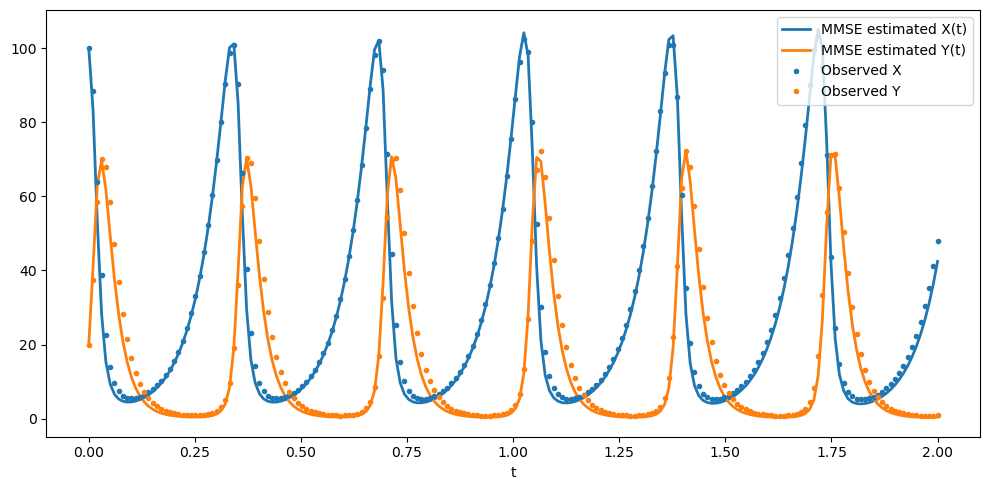

In [50]:

soln_obj = integrate.solve_ivp(lotka_volterra, [t[0],t[-1]], (X0,Y0), \
                                args=(alpha_mmse,beta_mmse,gamma_mmse,delta_mmse), dense_output=True)

mpl.style.use('default')
plt.figure(figsize=(10,5))
p0=plt.plot(t, soln_obj.sol(t)[0], linewidth=2, label="MMSE estimated X(t)")
p1=plt.plot(t, soln_obj.sol(t)[1], linewidth=2, label="MMSE estimated Y(t)")
plt.plot(t, observed_data[0], 'o', label="Observed X", color=p0[0].get_color(), markersize=3)
plt.plot(t, observed_data[1], 'o', label="Observed Y", color=p1[0].get_color(), markersize=3)
plt.xlabel("t")
plt.legend()
plt.tight_layout()
plt.show()